In [1]:
!pip install --upgrade numpy matplotlib


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


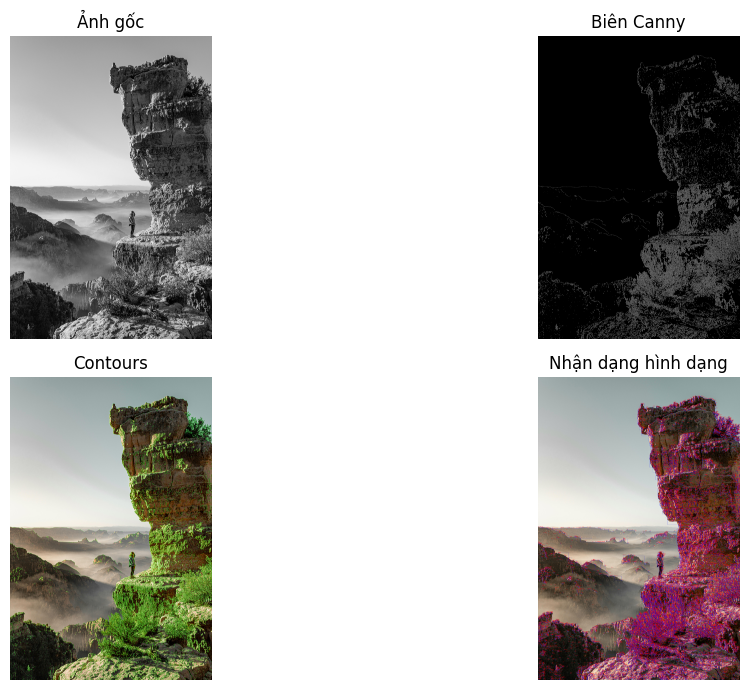

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# 🖼️ Tải ảnh mẫu từ GitHub
url = "https://raw.githubusercontent.com/trieuhoang1212/Labs_ComputerVision/main/Lab3/assets/images/anh_mau2.jpg"
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(image, cv2.IMREAD_COLOR)

# Chuyển sang ảnh xám
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Phát hiện biên bằng Canny
edges = cv2.Canny(gray, 100, 200)

# Tìm các contour (vùng khép kín)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Vẽ các contour lên ảnh
img_contours = img.copy()
cv2.drawContours(img_contours, contours, -1, (0,255,0), 1)

# Nhận dạng hình dạng cơ bản
shape_img = img.copy()
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.02*cv2.arcLength(cnt, True), True)
    
    if len(approx) == 3:
        shape = "Triangle"
    elif len(approx) == 4:
        shape = "Rectangle"
    elif len(approx) > 10:
        shape = "Circle"
    else:
        shape = "Other"

    x, y, w, h = cv2.boundingRect(cnt)
    cv2.putText(shape_img, shape, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,255), 1)
    cv2.rectangle(shape_img, (x,y), (x+w, y+h), (255,0,0), 1)

# Hiển thị kết quả
titles = ['Ảnh gốc', 'Biên Canny', 'Contours', 'Nhận dạng hình dạng']
images = [gray, edges, img_contours, shape_img]

plt.figure(figsize=(14,7))
for i in range(4):
    plt.subplot(2,2,i+1)
    if i == 1:
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
